<a href="https://colab.research.google.com/github/kiyong21c/kaggle/blob/main/20220608_cat-in-dat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data_path = '/content/drive/MyDrive/Colab Notebooks/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [3]:
train_temp = pd.read_csv(data_path + 'train.csv')

In [4]:
train.shape, train_temp.shape # index_col='id' 지정으로 shape 변화됨

((300000, 24), (300000, 25))

In [5]:
train.shape, test.shape # 훈련데이터 300,000행, 테스트데이터 200,000행

((300000, 24), (200000, 23))

In [6]:
train.head() # 피처 개수가 많아서 중간 피처들이 생략됨

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [7]:
pd.options.display.max_columns=24 # 열 개수 24개 까지 생략없이 출력됨 

In [8]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [9]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


 - 인덱스 300,000부터 시작
 - 테스트 데이터 인덱스가 300,000부터 시작하기 때문

 - target 열은 기본값이 0.5로 일괄 입력돼 있음
 - 타깃값은 0과 1
 - 이중 타깃값이 1일 확률을 예측해 저장

### 피처 요약표 만들기

In [10]:
def resumetable(df):
    print('데이터 형상 : {}'.format(df.shape))
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    # isnull() : 결측값이면 True, 아니면 False의 DataFrame
    # sum() : 컬럼별로 True의 개수를 Series
    # values : Series의 값만 → array 형태로
    summary['고유값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values

    return summary

resumetable(train)

데이터 형상 : (300000, 24)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


 - 이진 피처 : bin_0~bin_4(0/1, F/T, N/Y) → T,Y는 1로 F,N은 0으로 인코딩
 - 명목형 피처 : num_0~num_9
 - 순서형 피처 : ord_0~ord_5
 - 그 외 피처 : day, month, target

 - 순서형 데이터는 순서에 따라 타깃값에 미치는 영향이 다르기 때문에 순서에 유의하며 인코딩

In [11]:
# 순서를 파악하기 위해 순서형 피처의 고유값을 확인해보자
for i in range(3):
    feature = 'ord_' + str(i)
    print('{} 고유값 : {}'.format(feature, train[feature].unique())) # unique() : 고윳값이 등장한 순으로 출력됨

ord_0 고유값 : [2 1 3]
ord_1 고유값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고유값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [12]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print('{} 고유값 : {}'.format(feature, train[feature].unique())) # unique() : 고윳값이 등장한 순으로 출력됨

ord_3 고유값 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고유값 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고유값 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb

In [13]:
print('day 고윳값:', train['day'].unique())
print('month 고윳값:', train['month'].unique())
print('target 고윳값:', train['target'].unique())

day 고윳값: [2 7 5 4 3 1 6]
month 고윳값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값: [0 1]


 - day 피처의 고윳값 7개 : 요일을 나타내는 듯

### 데이터 시각화
 - 타깃값 분포를 통해 데이터의 불균형 정도 파악
 - 보통은 양성(타깃값:1)이 음성(타깃값:0)에 비해 개수가 적다
 - 수치형 데이터 분포 파악 : displot()
 - 범주형 데이터 분포 파악 : countplot()

#### 타깃값 분포

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

Text(0.5, 1.0, 'Target Distribution')

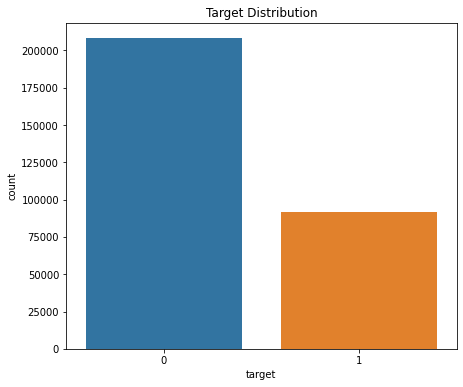

In [15]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution')

Text(0.5, 1.0, 'Target Distribution')

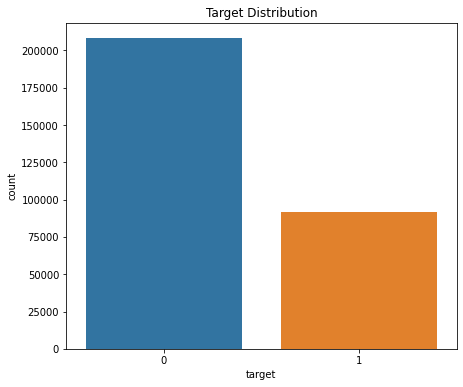

In [16]:
fig, ax = plt.subplots(figsize=(7,6))
ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution')

In [17]:
ax.patches # ax축을 구성하는 그래프 도형 객체 모두를 담은 리스트

 - Rectangle 객체 두개를 포함하는 리스트
 - 이 객체를 활용해 사각형 도형에 대한 정보 획득

In [18]:
rectangle = ax.patches[0]
print('사각형 높이:', rectangle.get_height()) # countplot()에서 막대의 높이 = 데이터 개수
print('사각형 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형 높이: 208236
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [19]:
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width() / 2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train) * 0.001)
# len(train) * 0.001 : 여백을 설정하려는데 막대의높이(데이터개수)의 비율을 고려해서 여백설정

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 208536.0


Text(0.5, 1.0, 'Target Distribution')

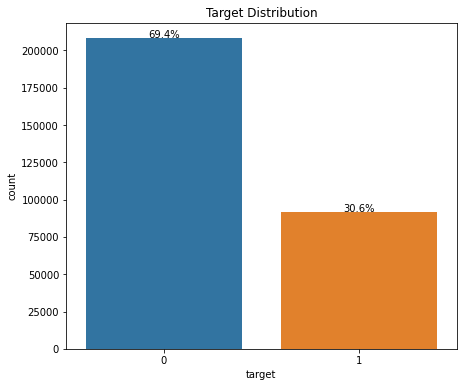

In [20]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100

        ax.text(x=left_coord + width/2.0,
                y=height + total_size*0.001,
                s=f'{percent:1.1f}%', # 입력 텍스트
                ha='center') # 가운데 정렬

plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

 - 7:3 분포

#### 이진 피처 분포
 - 고윳값이 Y/N인 bin_4 피처에서 Y인 데이터 중 타깃값 0/1을 구분하여 분포 확인
 - 특정 고윳값이 특정 타깃값에 치우치는지 확인

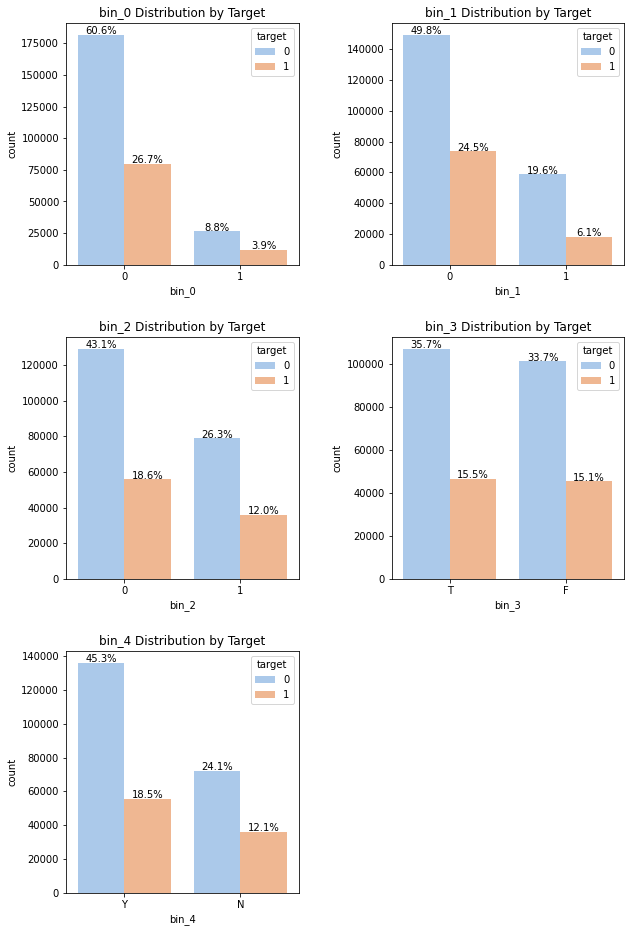

In [36]:
import matplotlib.gridspec as gridspec # 여러 그래프 격자 형태 배치

grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])     # subplot()의 매개변수로 GridSpec클래스 인스턴스인 grid 활용

    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel',
                  ax=ax)
    
    ax.set_title('{} Distribution by Target'.format(feature))
    write_percent(ax, len(train))       # 퍼센트 입력 : 위에서 만들어 놓은 함수

 - 고윳값별로 나눠봐도 타깃값 0,1 분포가 대체로 7:3 수준
 - 이진 피처들은 특정 타깃값에 치우치지 않았음

#### 명목형 피처 분포
 - num_5~nom_9 피처는 고윳값 개수가 많고 의미를 알 수 없는 문자열 → 시각화 불가

In [47]:
# 스텝 1 : 교차분석표 생성 함수 만들기
pd.crosstab(train['nom_0'], train['target']) # crosstab() : 고윳값별 타깃값의 개수

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [48]:
# 정규화 후 비율을 백분율로 표현
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index') * 100 # normalize='index' : 인덱스(행) 기준으로 정규화
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


 - 현재 인덱스가 피처 이름(nom_0)
 - nom_0인덱스를 열로 가져와야 그래프 그리기 편하다

In [49]:
crosstab = crosstab.reset_index() # 인덱스 재설정
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


 - 교차분석표는 앞으로 계속 사용 → 함수

In [ ]:
def get_crosstab(df, )